In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import os
from tqdm import trange, tqdm
import threading
from scipy.io import loadmat
import torch
from PIL import Image
from torchvision import transforms


In [25]:
a = np.array([[[1,2],[3,4]],[[5,6],[7,8]]])
np.append(a,[[[9,10],[11,12]],[[13,14],[15,16]]],axis = 2)

array([[[ 1,  2,  9, 10],
        [ 3,  4, 11, 12]],

       [[ 5,  6, 13, 14],
        [ 7,  8, 15, 16]]])

In [49]:
# TEST CELL 1
n = 2
    base_dir="/home/aritra/project/quartLT23/data/ILSVRC"

    train_files = [f"{base_dir}/train_npy/img_{i}.npy" for i in range(n)]

    # x_train, y_train = None, None
    train = None

    for i in range(n):
        if train is None:
            train = np.array([np.load(train_files[i])])
        else:
            train = np.append(train, [np.load(train_files[i])], axis=0)
print(f"{len(train)} train data loaded:\n",train)

2 train data loaded:
 [[4.48000000e+02 3.45098039e-01 3.76470588e-01 ... 5.09803922e-02
  1.21568627e-01 1.96078431e-02]
 [4.48000000e+02 8.00000000e-01 6.11764706e-01 ... 6.43137255e-01
  6.15686275e-01 5.76470588e-01]]


(150529,)
after: (224, 224)


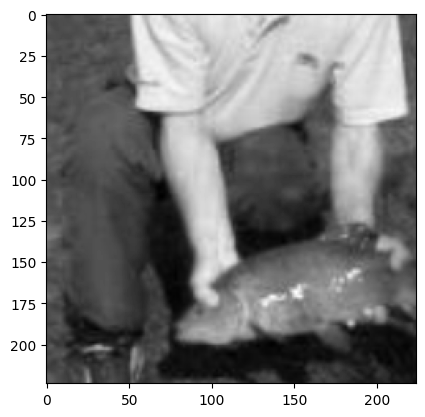

In [38]:
# TEST CELL 2
mat = np.array(
            [
                [1, 0, 0, 0.299],
                [0, 1, 0, 0.587],
                [0, 0, 1, 0.144]
            ])
data = np.load("/home/aritra/project/quartLT23/data/ILSVRC/train_npy/img_0.npy")
print(data.shape)
# b = data[1:].reshape(3, 224, 224).transpose(1,2,0)
# print(f"before: {b.shape}")
# b = b.transpose(1, 2, 0)
# print(f"after: {b.shape}")
# b = np.dot(b, mat).transpose(2, 0, 1)
# print(f"after: {b[:3].shape}")
b = data[1:].reshape(224, 224, 3)
b = np.transpose(b,(2,0,1))
# b = np.transpose(b,(1,2,0))
b = b[0]

print(f"after: {b.shape}")
plt.imshow(b,cmap="gray")

In [4]:
def is_png(filename: str) -> bool:
    return 'n02105855_2933.JPEG' in filename

def is_cmyk(filename: str) -> bool:
    denylist = ['n01739381_1309.JPEG',   'n02077923_14822.JPEG',
                'n02447366_23489.JPEG',  'n02492035_15739.JPEG',
                'n02747177_10752.JPEG',  'n03018349_4028.JPEG',
                'n03062245_4620.JPEG',   'n03347037_9675.JPEG',
                'n03467068_12171.JPEG',  'n03529860_11437.JPEG',
                'n03544143_17228.JPEG',  'n03633091_5218.JPEG',
                'n03710637_5125.JPEG',   'n03961711_5286.JPEG',
                'n04033995_2932.JPEG',   'n04258138_17003.JPEG',
                'n04264628_27969.JPEG',  'n04336792_7448.JPEG',
                'n04371774_5854.JPEG',   'n04596742_4225.JPEG',
                'n07583066_647.JPEG',    'n13037406_4650.JPEG']
    for file in denylist:
        if file in filename:
            return True
    return False

In [53]:
meta = loadmat("/home/aritra/project/quartLT23/data/ILSVRC/ILSVRC/ILSVRC2012_devkit_t12/data/meta.mat")['synsets']
classinfo = {}
for i in range(1000):
    classinfo[meta[i][0][1][0]] = meta[i][0][0][0][0] 
print(classinfo)

base_dir = "/home/aritra/project/quartLT23/data/ILSVRC/ILSVRC/Data/CLS-LOC/"
train_dir = base_dir+"train/"
test_dir = base_dir+"test/"
val_dir = base_dir+"val/" 

{'n02119789': 1, 'n02100735': 2, 'n02110185': 3, 'n02096294': 4, 'n02102040': 5, 'n02066245': 6, 'n02509815': 7, 'n02124075': 8, 'n02417914': 9, 'n02123394': 10, 'n02125311': 11, 'n02423022': 12, 'n02346627': 13, 'n02077923': 14, 'n02110063': 15, 'n02447366': 16, 'n02109047': 17, 'n02089867': 18, 'n02102177': 19, 'n02091134': 20, 'n02092002': 21, 'n02071294': 22, 'n02442845': 23, 'n02504458': 24, 'n02092339': 25, 'n02098105': 26, 'n02096437': 27, 'n02114712': 28, 'n02105641': 29, 'n02128925': 30, 'n02091635': 31, 'n02088466': 32, 'n02096051': 33, 'n02117135': 34, 'n02138441': 35, 'n02097130': 36, 'n02493509': 37, 'n02457408': 38, 'n02389026': 39, 'n02443484': 40, 'n02110341': 41, 'n02089078': 42, 'n02086910': 43, 'n02445715': 44, 'n02093256': 45, 'n02113978': 46, 'n02106382': 47, 'n02441942': 48, 'n02113712': 49, 'n02113186': 50, 'n02105162': 51, 'n02415577': 52, 'n02356798': 53, 'n02488702': 54, 'n02123159': 55, 'n02098413': 56, 'n02422699': 57, 'n02114855': 58, 'n02094433': 59, 'n021

In [59]:

file = open('/home/aritra/project/quartLT23/data/ILSVRC/ILSVRC/ImageSets/CLS-LOC/train_cls.txt', "r")
trainimages_labels = file.readlines()
# print(trainimages_labels[0])
file.close()
for i in range(len(trainimages_labels)):
    trainimages_labels[i] = trainimages_labels[i].split()
    trainimages_labels[i][1] = classinfo[trainimages_labels[i][0][:9]]
print(trainimages_labels[0])

n01440764/n01440764_10026 1

['n01440764/n01440764_10026', 449]


In [ ]:
# finding index for a specific filename from the trainmagenames

for i in range(1281167):
    if trainimages_labels[i][0] == 'n02105855/n02105855_2933':
        print(i)

415
(250, 250, 3)
[4.49000000e+02 3.45098039e-01 3.76470588e-01 ... 5.09803922e-02
 1.21568627e-01 1.96078431e-02]
(150529,)


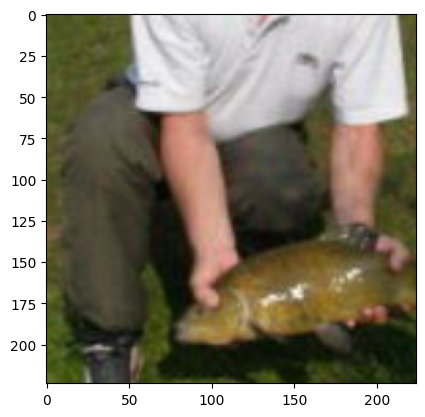

In [79]:
# SINGLE IMAGE PROCESSIONG TESTS

torch.manual_seed(17)

# i = 294566 #BAD IMAGE !
i = 0
shorter_side = torch.randint(256, 481, size=(1,)).item()
print(shorter_side)

img = Image.open(f"{train_dir}{trainimages_labels[i][0]}.JPEG")
imgdata = np.array(img.getdata()).reshape(img.size[1], img.size[0], 3)/255
plt.imshow(imgdata)
print(imgdata.shape)

img = torch.nn.Sequential(transforms.Resize(shorter_side),transforms.RandomHorizontalFlip(),transforms.CenterCrop(shorter_side),transforms.RandomCrop(224))(img)
imgdata = np.insert((np.array(img.getdata()).reshape(img.size[1], img.size[0], 3)/255).flatten(),0,trainimages_labels[i][1])
print(imgdata)
print(imgdata.shape)
plt.imshow(imgdata[1:].reshape(224,224,3))

# did (0,294567),(294567,294570),(294570,300000),(300000,400000),(400000,700000),(700000,1000000),(1000000,1281167)

In [ ]:
# #finding grayscales

# indices = []
# for i in trange(len(trainimages_labels)):
#     if len(imread(f"{train_dir}{trainimages_labels[i][0]}.JPEG").shape) != 3:
#         indices.append(i)
# print(f"grayscales: {len(indices)}, indices = {indices}")

# indices2 = indices[1:]

# # grayscales: 19969

# # correcting grayscales

# count = 0
# for i in range(len(indices2)):
#     img = plt.imread(f"{train_dir}{trainimages_labels[indices2[i]][0]}.JPEG")
#     size = img.shape
#     if len(size) == 2:
#         count += 1
#         print("changed")
#         plt.imsave(f"{train_dir}{trainimages_labels[indices2[i]][0]}.JPEG",np.append(img,np.append(img,img)).reshape((3, size[0], size[1])).transpose(1, 2, 0))
# print(f"changed: {count}")
# # changed: 19969

In [60]:
# TRAIN IMAGE PROCESSING

torch.manual_seed(17)
i = 0
for filename, label in (trainimages_labels[:1]):
    print(filename, label)
    if "n02105855_2933" in filename:
        continue
    shorter_side = torch.randint(256, 481, size=(1,)).item()    
    seq = torch.nn.Sequential(
            transforms.Resize(shorter_side),
            transforms.RandomHorizontalFlip(),
            transforms.CenterCrop(shorter_side),
            transforms.RandomCrop(224)
        )
    img = seq(Image.open(f"{train_dir}{filename}.JPEG"))
    arr = np.append(label-1, np.array(img.getdata()).flatten()/255)
    np.save(f"/home/aritra/project/quartLT23/data/ILSVRC/train_npy/img_{i}.npy", arr)
    i += 1
    

n01440764/n01440764_10026 449


In [9]:
class Random:
    def __init__(self, seed: float = 0.1, range: list = [0,1]):
        self.seed = seed
        self.scale = lambda x: range[0] + x*(range[1]-range[0])
    def rand(self, a = 1103515245, c = 12345, m = 32768):
        self.seed = (a*self.seed + c) % m
        return self.scale(self.seed / m)

def take(file_name):
    if "n02105855_2933" in file_name:
        return False
    return True

class ProcessImage(threading.Thread):
    def __init__(self, file, label, i, n):
        self.file = f"{train_dir}{file}.JPEG"
        self.savename = f"/home/aritra/project/quartLT23/data/ILSVRC/train_npy/img_{i}.npy"
        self.n = n # seed
        self.label = label
        
        torch.manual_seed(int(n))
        
        shorter_side = torch.randint(256, 481, size=(1,)).item()    
        self.seq =  torch.nn.Sequential(
                transforms.Resize(shorter_side),
                transforms.RandomHorizontalFlip(),
                transforms.CenterCrop(shorter_side),
                transforms.RandomCrop(224)
            )

        super().__init__()

    def run(self):
        # # print(self.file)
        img = self.seq(Image.open(self.file))
        array = np.append(self.label-1, np.array(img.getdata()).flatten()/255)
        np.save(self.savename, array)
        # print(np.array(img.getdata()).shape)
        
# i = 0
# r = Random(17, [0, 100])
# for filename, label in tqdm(trainimages_labels):
#     if take(filename):
#         ProcessImage(filename, label, i, r.rand()).run()
#         i += 1

['n01440764/n01440764_10026', 449]

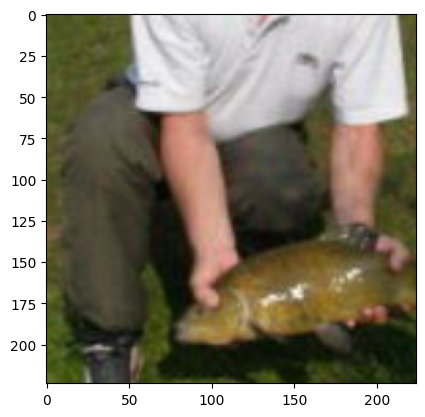

In [74]:
i = 0
a = np.load(f'/home/aritra/project/quartLT23/data/ILSVRC/train_npy/img_{i}.npy')
plt.imshow(a[1:].reshape(224,224,3))

In [46]:
#print class info from classid
print(type(a[0]))
i = int(a[0])

print(meta[i][0][0][0])
print(meta[i][0][1][0])
print(meta[i][0][2][0])
print(meta[i][0][3][0])

[169]
n02510455
giant panda, panda, panda bear, coon bear, Ailuropoda melanoleuca
large black-and-white herbivorous mammal of bamboo forests of China and Tibet; in some classifications considered a member of the bear family or of a separate family Ailuropodidae


In [67]:
file = open('/home/aritra/project/quartLT23/data/ILSVRC/ILSVRC/ImageSets/CLS-LOC/val.txt', "r")
testimages_labels = file.readlines()
file.close()

file = open('/home/aritra/project/quartLT23/data/ILSVRC/ILSVRC/ILSVRC2012_devkit_t12/data/ILSVRC2012_validation_ground_truth.txt','r')
testlabels = file.readlines()
file.close()

for i in range(len(testimages_labels)):
    testimages_labels[i] = testimages_labels[i].split()
    testimages_labels[i][1] = int(testlabels[i].split()[0])
print(testimages_labels[0])

['ILSVRC2012_val_00000001', 490]


In [291]:
# #finding grayscales in test

# indices3 = []
# for i in trange(len(testimages_labels)):
#     if len(imread(f"{val_dir}{testimages_labels[i][0]}.JPEG").shape) != 3:
#         indices3.append(i)
# print(f"grayscales: {len(indices3)}, indices = {indices3}")

# # grayscales: 899

# # correcting grayscales

# count = 0
# for i in trange(len(indices3)):
#     img = plt.imread(f"{val_dir}{testimages_labels[indices3[i]][0]}.JPEG")
#     size = img.shape
#     if len(size) == 2:
#         count += 1
#         # print("changed")
#         plt.imsave(f"{val_dir}{testimages_labels[indices3[i]][0]}.JPEG",np.append(img,np.append(img,img)).reshape((3, size[0], size[1])).transpose(1, 2, 0))
# print(f"changed: {count}")
# # changed: 899

100%|██████████| 50000/50000 [01:36<00:00, 520.58it/s]

grayscales: 899, indices = [33, 106, 117, 125, 140, 295, 316, 376, 391, 428, 531, 559, 635, 703, 759, 871, 888, 895, 1026, 1027, 1169, 1248, 1250, 1265, 1316, 1347, 1419, 1435, 1534, 1540, 1553, 1604, 1659, 1768, 1769, 1874, 1946, 1976, 1986, 2044, 2077, 2084, 2159, 2160, 2172, 2360, 2399, 2427, 2450, 2493, 2499, 2553, 2693, 2735, 2796, 2819, 2893, 2904, 2919, 2925, 2954, 2957, 3022, 3041, 3077, 3155, 3181, 3249, 3295, 3350, 3400, 3407, 3416, 3435, 3466, 3484, 3487, 3619, 3729, 3741, 3759, 3812, 3854, 3991, 4065, 4112, 4349, 4362, 4411, 4428, 4446, 4485, 4513, 4607, 4739, 4767, 4816, 4922, 4925, 5027, 5091, 5103, 5115, 5163, 5183, 5240, 5358, 5399, 5428, 5438, 5504, 5532, 5625, 5669, 5691, 5692, 5711, 5716, 5772, 5898, 5905, 5923, 5942, 5975, 5994, 6040, 6070, 6096, 6127, 6335, 6443, 6455, 6475, 6505, 6526, 6532, 6626, 6651, 6673, 6734, 6752, 6761, 6786, 6826, 6949, 7110, 7175, 7186, 7189, 7194, 7399, 7414, 7462, 7483, 7658, 7719, 7753, 7754, 7892, 7916, 7923, 8140, 8158, 8284, 8379, 8

In [73]:
torch.manual_seed(17)

i = 0
for filename, label in tqdm(testimages_labels):
    # print(filename,label)
    shorter_side = torch.randint(256, 481, size=(1,)).item() 
    seq = torch.nn.Sequential(
            transforms.Resize(shorter_side),
            transforms.RandomHorizontalFlip(),
            transforms.CenterCrop(shorter_side),
            transforms.RandomCrop(224)
        )
      
    img = seq(Image.open(f"{val_dir}{filename}.JPEG"))
    arr = np.append(label-1, np.array(img.getdata()).flatten()/255)
    # print(arr)
    np.save(f"/home/aritra/project/quartLT23/data/ILSVRC/test_npy/img_{i}.npy",arr)
    i += 1

100%|██████████| 50000/50000 [10:39<00:00, 78.20it/s]


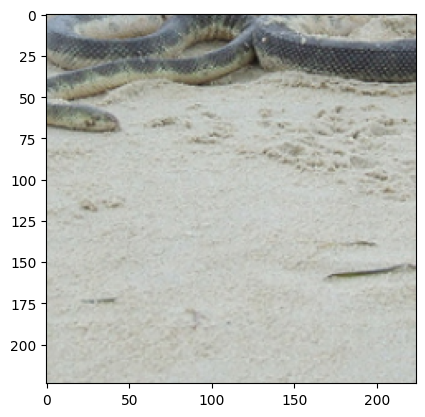

In [70]:
i = 0
# a = np.load(f'/home/aritra/project/quartLT23/data/ILSVRC/train_npy/img_{i}.npy')
a = np.load(f'/home/aritra/project/quartLT23/data/ILSVRC/test_npy/img_{i}.npy')
plt.imshow(a[1:].reshape(224,224,3))

In [71]:
#print class info from classid
classid = int(a[0])
# print(classid)

print(meta[classid][0][0][0])
print(meta[classid][0][1][0])
print(meta[classid][0][2][0])
print(meta[classid][0][3][0])

[490]
n01751748
sea snake
any of numerous venomous aquatic viviparous snakes having a fin-like tail; of warm littoral seas; feed on fish which they immobilize with quick-acting venom


In [ ]:
# deleting arge arrays which is already processed
# dont delete these variables, if you can probe the codes correctness

del meta, classinfo, testlabels, testimages_labels, trainimages_labels